In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [30]:
data = pd.read_excel("aggregateRockData.xlsx", header=None)
feature = pd.read_csv("norm540.txt", delimiter='\t', header=None)
label = data.iloc[:, :2]

In [31]:
label_column_names = ['Rock number', 'Category number']
feature_column_names = ['Rock number', 'Subtype number', 'Token number', 'Porphyritic texture', 'Presence of holes', 'Salient green hue', 'Pegmatitic texture','Conchoidal fracture','Angular fragments', 'Rounded fragments',
                        'Straight stripes', 'Curved stripes', 'Physical layers','Veins', 'Oily/shimmery texture',
                        'Splotchy texture', 'Single translucent crystal', 'Multiple cubic crystals', 'Sandy texture', 'Fragments',
                        'Stripes', 'Crystals']
label.columns = label_column_names
feature.columns = feature_column_names

In [32]:
label.head()

,Rock number,Category number
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1


In [33]:
feature.head()

,Rock number,Subtype number,Token number,Porphyritic texture,Presence of holes,Salient green hue,Pegmatitic texture,Conchoidal fracture,Angular fragments,Rounded fragments,...,Physical layers,Veins,Oily/shimmery texture,Splotchy texture,Single translucent crystal,Multiple cubic crystals,Sandy texture,Fragments,Stripes,Crystals
0,1,1,1,1.690468,-0.159688,-0.646115,-0.252007,-0.609794,0.579927,0.375313,...,-0.759128,-0.013842,-0.540653,0.946521,-0.227922,-0.225045,-0.116312,0.635812,-0.409247,-0.310419
1,2,1,2,1.690468,-0.159688,-0.530724,0.127922,-0.482150,2.865772,0.375313,...,-0.529150,-0.512160,-0.540653,-0.249084,-0.227922,0.185510,-0.401124,2.042938,-0.409247,-0.034059
2,3,1,3,1.665576,-0.407623,0.858984,-0.631936,-0.443857,2.611790,-0.405184,...,-0.529150,-0.512160,-0.540653,1.245422,-0.227922,-0.225045,-0.401124,1.665865,-0.409247,-0.310419
3,4,1,4,2.233118,-0.407623,-0.415333,-0.424702,-1.120369,0.071962,4.017633,...,-0.529150,-0.512160,-0.540653,-0.249084,-0.227922,-0.225045,-0.116312,2.640737,-0.409247,-0.310419
4,5,1,5,2.213204,-0.159688,1.129901,-0.044773,-1.082076,1.341876,3.757467,...,-0.759128,-0.512160,-0.540653,-0.249084,-0.227922,-0.225045,-0.401124,2.659131,-0.409247,-0.310419


In [34]:
#merging the two datasets using common attribute 'Rock Number'
df = pd.merge(label, feature, on='Rock number', how='inner')

##**Question 1**

**Display the statistical values for each of the attributes, along with visualizations (e.g., histogram) of the distributions for each attribute. Are there any attributes that might require special treatment? If so, what special treatment might they require?**

In [35]:
df.head()

,Rock number,Category number,Subtype number,Token number,Porphyritic texture,Presence of holes,Salient green hue,Pegmatitic texture,Conchoidal fracture,Angular fragments,...,Physical layers,Veins,Oily/shimmery texture,Splotchy texture,Single translucent crystal,Multiple cubic crystals,Sandy texture,Fragments,Stripes,Crystals
0,1,1,1,1,1.690468,-0.159688,-0.646115,-0.252007,-0.609794,0.579927,...,-0.759128,-0.013842,-0.540653,0.946521,-0.227922,-0.225045,-0.116312,0.635812,-0.409247,-0.310419
1,2,1,1,2,1.690468,-0.159688,-0.530724,0.127922,-0.482150,2.865772,...,-0.529150,-0.512160,-0.540653,-0.249084,-0.227922,0.185510,-0.401124,2.042938,-0.409247,-0.034059
2,3,1,1,3,1.665576,-0.407623,0.858984,-0.631936,-0.443857,2.611790,...,-0.529150,-0.512160,-0.540653,1.245422,-0.227922,-0.225045,-0.401124,1.665865,-0.409247,-0.310419
3,4,1,1,4,2.233118,-0.407623,-0.415333,-0.424702,-1.120369,0.071962,...,-0.529150,-0.512160,-0.540653,-0.249084,-0.227922,-0.225045,-0.116312,2.640737,-0.409247,-0.310419
4,5,1,1,5,2.213204,-0.159688,1.129901,-0.044773,-1.082076,1.341876,...,-0.759128,-0.512160,-0.540653,-0.249084,-0.227922,-0.225045,-0.401124,2.659131,-0.409247,-0.310419


In [36]:
columns_to_drop = ["Subtype number", "Token number", "Rock number"]
df.drop(columns=columns_to_drop, inplace=True)

In [37]:
df

,Category number,Porphyritic texture,Presence of holes,Salient green hue,Pegmatitic texture,Conchoidal fracture,Angular fragments,Rounded fragments,Straight stripes,Curved stripes,Physical layers,Veins,Oily/shimmery texture,Splotchy texture,Single translucent crystal,Multiple cubic crystals,Sandy texture,Fragments,Stripes,Crystals
0,1,1.690468,-0.159688,-0.646115,-0.252007,-0.609794,0.579927,0.375313,-0.352386,-0.260224,-0.759128,-0.013842,-0.540653,0.946521,-0.227922,-0.225045,-0.116312,0.635812,-0.409247,-0.310419
1,1,1.690468,-0.159688,-0.530724,0.127922,-0.482150,2.865772,0.375313,-0.352386,-0.260224,-0.529150,-0.512160,-0.540653,-0.249084,-0.227922,0.185510,-0.401124,2.042938,-0.409247,-0.034059
2,1,1.665576,-0.407623,0.858984,-0.631936,-0.443857,2.611790,-0.405184,-0.352386,-0.260224,-0.529150,-0.512160,-0.540653,1.245422,-0.227922,-0.225045,-0.401124,1.665865,-0.409247,-0.310419
3,1,2.233118,-0.407623,-0.415333,-0.424702,-1.120369,0.071962,4.017633,-0.352386,-0.260224,-0.529150,-0.512160,-0.540653,-0.249084,-0.227922,-0.225045,-0.116312,2.640737,-0.409247,-0.310419
4,1,2.213204,-0.159688,1.129901,-0.044773,-1.082076,1.341876,3.757467,-0.352386,-0.260224,-0.759128,-0.512160,-0.540653,-0.249084,-0.227922,-0.225045,-0.401124,2.659131,-0.409247,-0.310419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,3,-0.037053,-0.159688,-0.435401,-0.410886,-1.126751,-0.436004,-0.405184,-0.352386,-0.260224,-0.759128,-0.512160,-0.540653,-0.547986,-0.227922,7.986072,-0.685937,-0.541391,-0.409247,5.216791
536,3,-0.584681,-0.407623,-0.957168,-0.493780,0.066717,-0.436004,-0.405184,4.102756,0.045922,-0.069195,-0.013842,-0.540653,-0.846887,-0.227922,-0.225045,1.592561,-0.541391,3.054169,-0.310419
537,3,-0.559789,0.881638,0.066299,-1.053311,-1.088458,-0.436004,-0.405184,-0.352386,-0.260224,-0.759128,-0.512160,-0.540653,-0.846887,-0.227922,-0.225045,5.010309,-0.541391,-0.409247,-0.310419
538,3,-0.753949,-0.407623,-0.029024,-0.701014,0.366680,-0.436004,-0.405184,-0.352386,-0.260224,1.770626,0.484475,-0.353270,-0.547986,-0.227922,-0.225045,-0.685937,-0.541391,-0.409247,-0.310419


## **Checking how much data is present using 'shape'**

In [38]:
df.shape

(540, 20)

## **Information of our Data**

In [39]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 540 entries, 0 to 539
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Category number             540 non-null    int64  
 1   Porphyritic texture         540 non-null    float64
 2   Presence of holes           540 non-null    float64
 3   Salient green hue           540 non-null    float64
 4   Pegmatitic texture          540 non-null    float64
 5   Conchoidal fracture         540 non-null    float64
 6   Angular fragments           540 non-null    float64
 7   Rounded fragments           540 non-null    float64
 8   Straight stripes            540 non-null    float64
 9   Curved stripes              540 non-null    float64
 10  Physical layers             540 non-null    float64
 11  Veins                       540 non-null    float64
 12  Oily/shimmery texture       540 non-null    float64
 13  Splotchy texture            540 non

## **Statistical values of the attributes**

In [40]:
df.describe()

,Category number,Porphyritic texture,Presence of holes,Salient green hue,Pegmatitic texture,Conchoidal fracture,Angular fragments,Rounded fragments,Straight stripes,Curved stripes,Physical layers,Veins,Oily/shimmery texture,Splotchy texture,Single translucent crystal,Multiple cubic crystals,Sandy texture,Fragments,Stripes,Crystals
count,540.000000,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02,5.400000e+02
mean,2.000000,-1.851852e-09,9.629630e-08,5.370370e-08,-6.296296e-08,-4.074074e-08,-1.537037e-07,-1.666667e-08,-1.814815e-07,-1.481481e-08,-1.166667e-07,-1.629630e-07,1.703704e-07,-6.851852e-08,-5.555556e-09,3.388889e-07,1.203704e-07,-1.148148e-07,-1.759259e-07,3.018519e-07
std,0.817254,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,9.999999e-01,1.000000e+00,1.000000e+00,9.999999e-01,1.000000e+00,1.000000e+00,1.000000e+00,9.999999e-01
min,1.000000,-1.321491e+00,-4.076230e-01,-1.187950e+00,-1.322715e+00,-1.248012e+00,-4.360040e-01,-4.051840e-01,-3.523860e-01,-2.602240e-01,-7.591280e-01,-5.121600e-01,-5.406530e-01,-8.468870e-01,-2.279220e-01,-2.250450e-01,-6.859370e-01,-5.413910e-01,-4.092470e-01,-3.104190e-01
25%,1.000000,-8.236470e-01,-4.076230e-01,-7.615050e-01,-8.046310e-01,-6.991450e-01,-4.360040e-01,-4.051840e-01,-3.523860e-01,-2.602240e-01,-7.591280e-01,-5.121600e-01,-5.406530e-01,-8.468870e-01,-2.279220e-01,-2.250450e-01,-6.859370e-01,-5.413910e-01,-4.092470e-01,-3.104190e-01
50%,2.000000,-3.009100e-01,-4.076230e-01,-3.751970e-01,-1.829290e-01,-2.715380e-01,-4.360040e-01,-4.051840e-01,-3.523860e-01,-2.602240e-01,-2.991730e-01,-5.121600e-01,-5.406530e-01,-2.490840e-01,-2.279220e-01,-2.250450e-01,-4.011240e-01,-5.413910e-01,-4.092470e-01,-3.104190e-01
75%,3.000000,7.644770e-01,-1.596880e-01,5.843033e-01,5.769290e-01,3.571070e-01,-1.820210e-01,-1.450180e-01,-3.523860e-01,-2.602240e-01,3.907600e-01,-1.384200e-02,-1.658870e-01,3.487180e-01,-2.279220e-01,-2.250450e-01,1.685000e-01,1.042300e-02,-2.072980e-01,-3.104190e-01
max,3.000000,2.422299e+00,4.551072e+00,2.750390e+00,4.175892e+00,3.813059e+00,4.643652e+00,4.798130e+00,4.888957e+00,5.862693e+00,3.610446e+00,8.457556e+00,3.207009e+00,4.832237e+00,7.120010e+00,7.986072e+00,5.010309e+00,3.137369e+00,3.629722e+00,5.216791e+00


##**Histogram for each attribute**

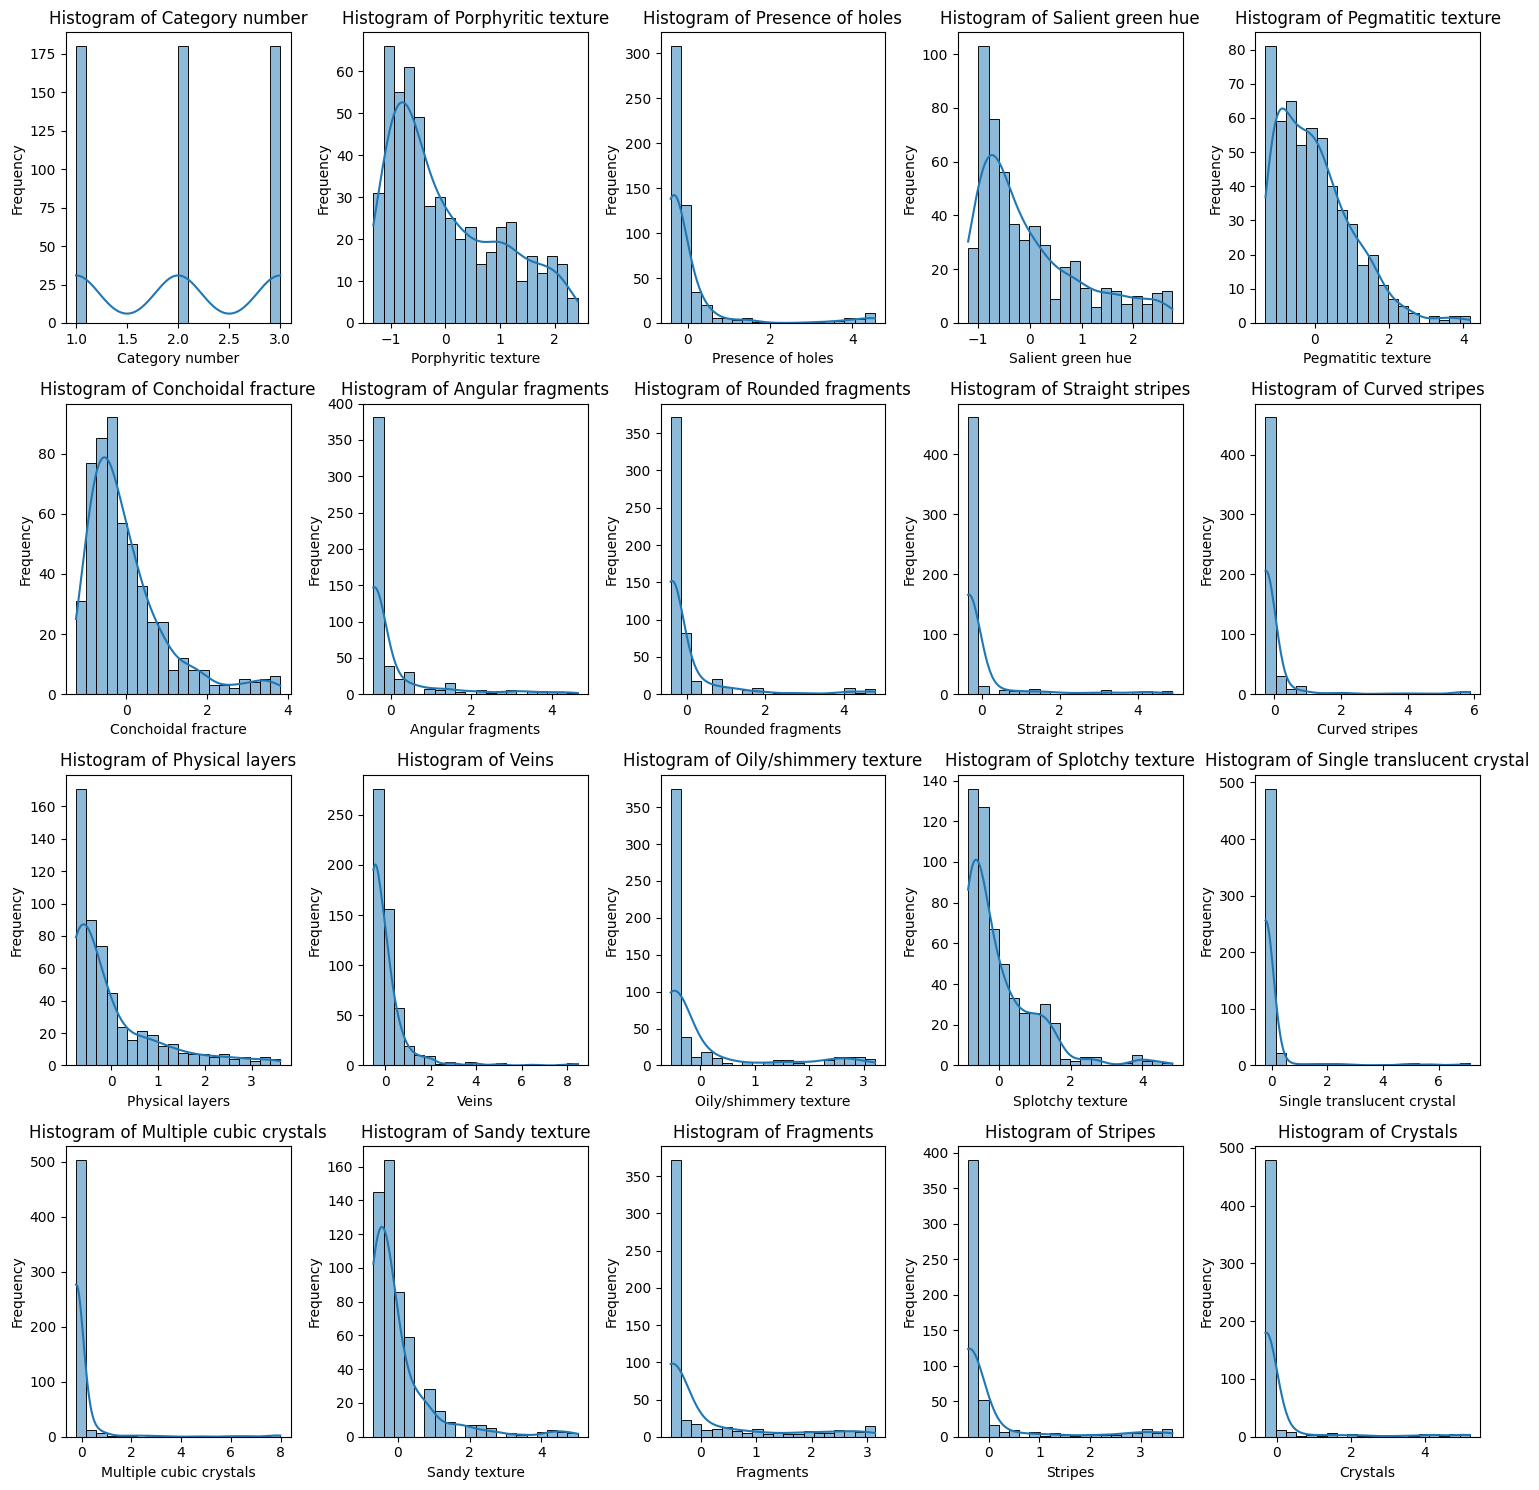

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Creating subplots
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(15, 15))

# Flatten 2D array of axes for easy iteration
axes = axes.flatten()

# Plotting histograms
for i, column in enumerate(numerical_cols):
    ax = axes[i]
    sns.histplot(data=df, x=column, ax=ax, bins=20, kde=True)
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

## **Checking if there are any NULL values in the data**

In [42]:
df.isna().sum()

Category number               0
Porphyritic texture           0
Presence of holes             0
Salient green hue             0
Pegmatitic texture            0
Conchoidal fracture           0
Angular fragments             0
Rounded fragments             0
Straight stripes              0
Curved stripes                0
Physical layers               0
Veins                         0
Oily/shimmery texture         0
Splotchy texture              0
Single translucent crystal    0
Multiple cubic crystals       0
Sandy texture                 0
Fragments                     0
Stripes                       0
Crystals                      0
dtype: int64

There are no missing values.

From the histograms, we can say that most of the attributes have outliers. So, we will use standardization.

##**Question 2**

**Analyze and discuss the relationships between the data attributes, and between the data attributes and label. This involves computing the Pearson Correlation Coefficient (PCC) and generating scatter plots.**




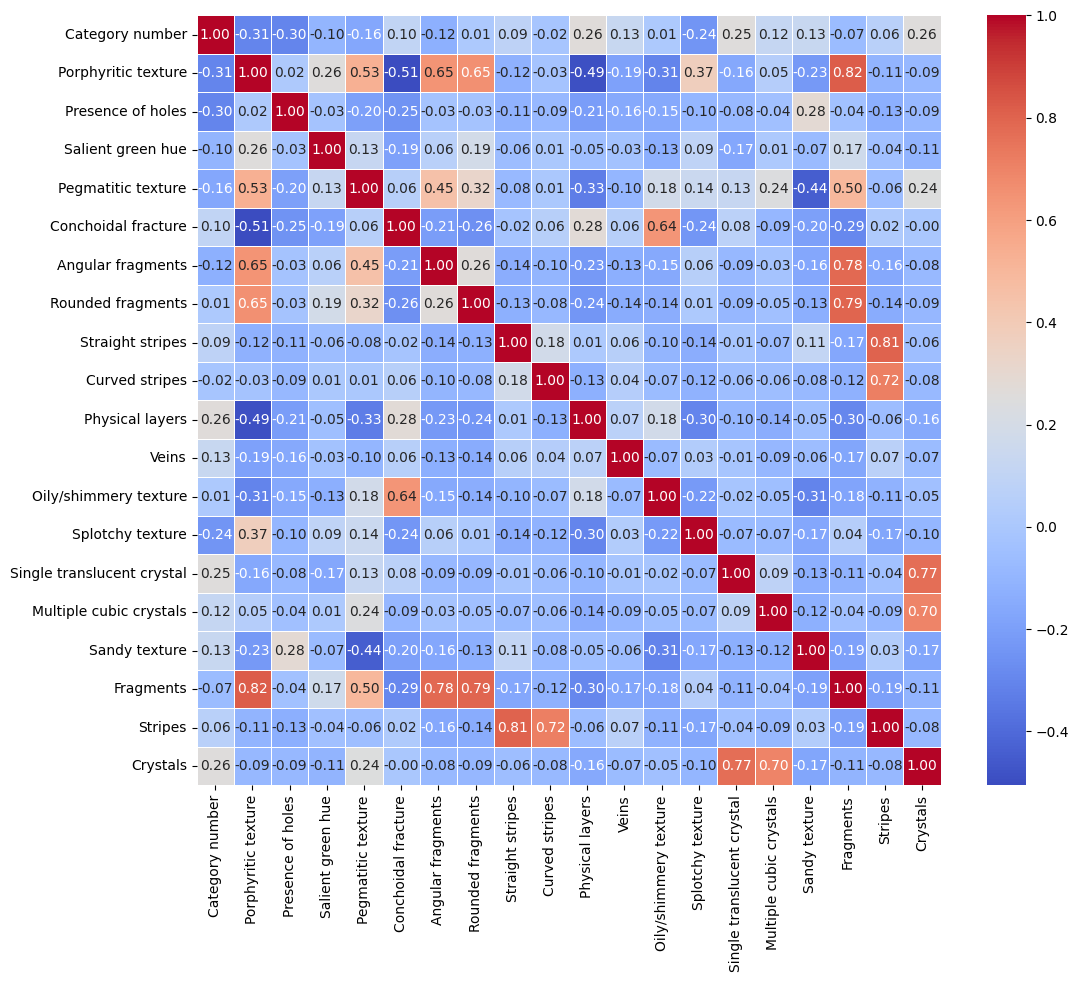

,Category number,Porphyritic texture,Presence of holes,Salient green hue,Pegmatitic texture,Conchoidal fracture,Angular fragments,Rounded fragments,Straight stripes,Curved stripes,Physical layers,Veins,Oily/shimmery texture,Splotchy texture,Single translucent crystal,Multiple cubic crystals,Sandy texture,Fragments,Stripes,Crystals
Category number,1.000000,-0.305296,-0.301462,-0.104748,-0.164925,0.103781,-0.123388,0.009450,0.086923,-0.016680,0.262855,0.130094,0.007679,-0.242921,0.253550,0.121163,0.132240,-0.068022,0.061825,0.258386
Porphyritic texture,-0.305296,1.000000,0.017601,0.255830,0.534070,-0.505542,0.645724,0.653319,-0.117642,-0.026782,-0.490498,-0.189307,-0.310966,0.373241,-0.163897,0.046817,-0.226060,0.819815,-0.108380,-0.086319
Presence of holes,-0.301462,0.017601,1.000000,-0.026329,-0.199425,-0.248047,-0.026176,-0.026623,-0.112504,-0.086442,-0.210501,-0.155518,-0.154314,-0.098999,-0.082330,-0.044729,0.283791,-0.035854,-0.132162,-0.087471
Salient green hue,-0.104748,0.255830,-0.026329,1.000000,0.126113,-0.189701,0.064291,0.186064,-0.061815,0.006080,-0.050614,-0.033938,-0.131127,0.089565,-0.168250,0.011505,-0.072024,0.169734,-0.042696,-0.109629
Pegmatitic texture,-0.164925,0.534070,-0.199425,0.126113,1.000000,0.055266,0.450381,0.321181,-0.081682,0.006070,-0.334001,-0.099182,0.180904,0.141837,0.128090,0.237183,-0.442259,0.498259,-0.055575,0.243675
Conchoidal fracture,0.103781,-0.505542,-0.248047,-0.189701,0.055266,1.000000,-0.210173,-0.260734,-0.019918,0.058211,0.275226,0.058838,0.641196,-0.240125,0.075173,-0.088640,-0.196296,-0.293316,0.018864,-0.002322
Angular fragments,-0.123388,0.645724,-0.026176,0.064291,0.450381,-0.210173,1.000000,0.260913,-0.137379,-0.103715,-0.229081,-0.130497,-0.152724,0.055986,-0.086229,-0.027110,-0.164748,0.783714,-0.161878,-0.078127
Rounded fragments,0.009450,0.653319,-0.026623,0.186064,0.321181,-0.260734,0.260913,1.000000,-0.125969,-0.084503,-0.236336,-0.143923,-0.136893,0.009402,-0.090216,-0.045775,-0.133824,0.794627,-0.143357,-0.093649
Straight stripes,0.086923,-0.117642,-0.112504,-0.061815,-0.081682,-0.019918,-0.137379,-0.125969,1.000000,0.178444,0.006392,0.055417,-0.102114,-0.140431,-0.014729,-0.071865,0.106271,-0.168211,0.805348,-0.055964
Curved stripes,-0.016680,-0.026782,-0.086442,0.006080,0.006070,0.058211,-0.103715,-0.084503,0.178444,1.000000,-0.125805,0.043942,-0.069111,-0.116719,-0.055039,-0.057039,-0.076266,-0.120035,0.715588,-0.076533


In [43]:
# Calculating the Pearson Correlation Coefficient (PCC) between data attributes and label
correlations = df.corr(numeric_only=True)
# Creating a heatmap with adjusted annotation size
plt.figure(figsize=(12, 10))
sns.heatmap(correlations, annot=True, annot_kws={"size": 10}, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Displaying the heatmap
plt.show()
correlations

In [44]:
# Load dataset into a DataFrame
# Replace 'merged_data' with actual dataset
df1 = df.copy()

## **Correlation between data attributes and label**

In [45]:
#Checking the correlation with the target attribute

target_attribute = 'Category number'
correlation_with_target = df1.corr(numeric_only=True)[target_attribute].sort_values(ascending=False)
correlation_with_target

Category number               1.000000
Physical layers               0.262855
Crystals                      0.258386
Single translucent crystal    0.253550
Sandy texture                 0.132240
Veins                         0.130094
Multiple cubic crystals       0.121163
Conchoidal fracture           0.103781
Straight stripes              0.086923
Stripes                       0.061825
Rounded fragments             0.009450
Oily/shimmery texture         0.007679
Curved stripes               -0.016680
Fragments                    -0.068022
Salient green hue            -0.104748
Angular fragments            -0.123388
Pegmatitic texture           -0.164925
Splotchy texture             -0.242921
Presence of holes            -0.301462
Porphyritic texture          -0.305296
Name: Category number, dtype: float64

## **Scatter Plots for each attribute**

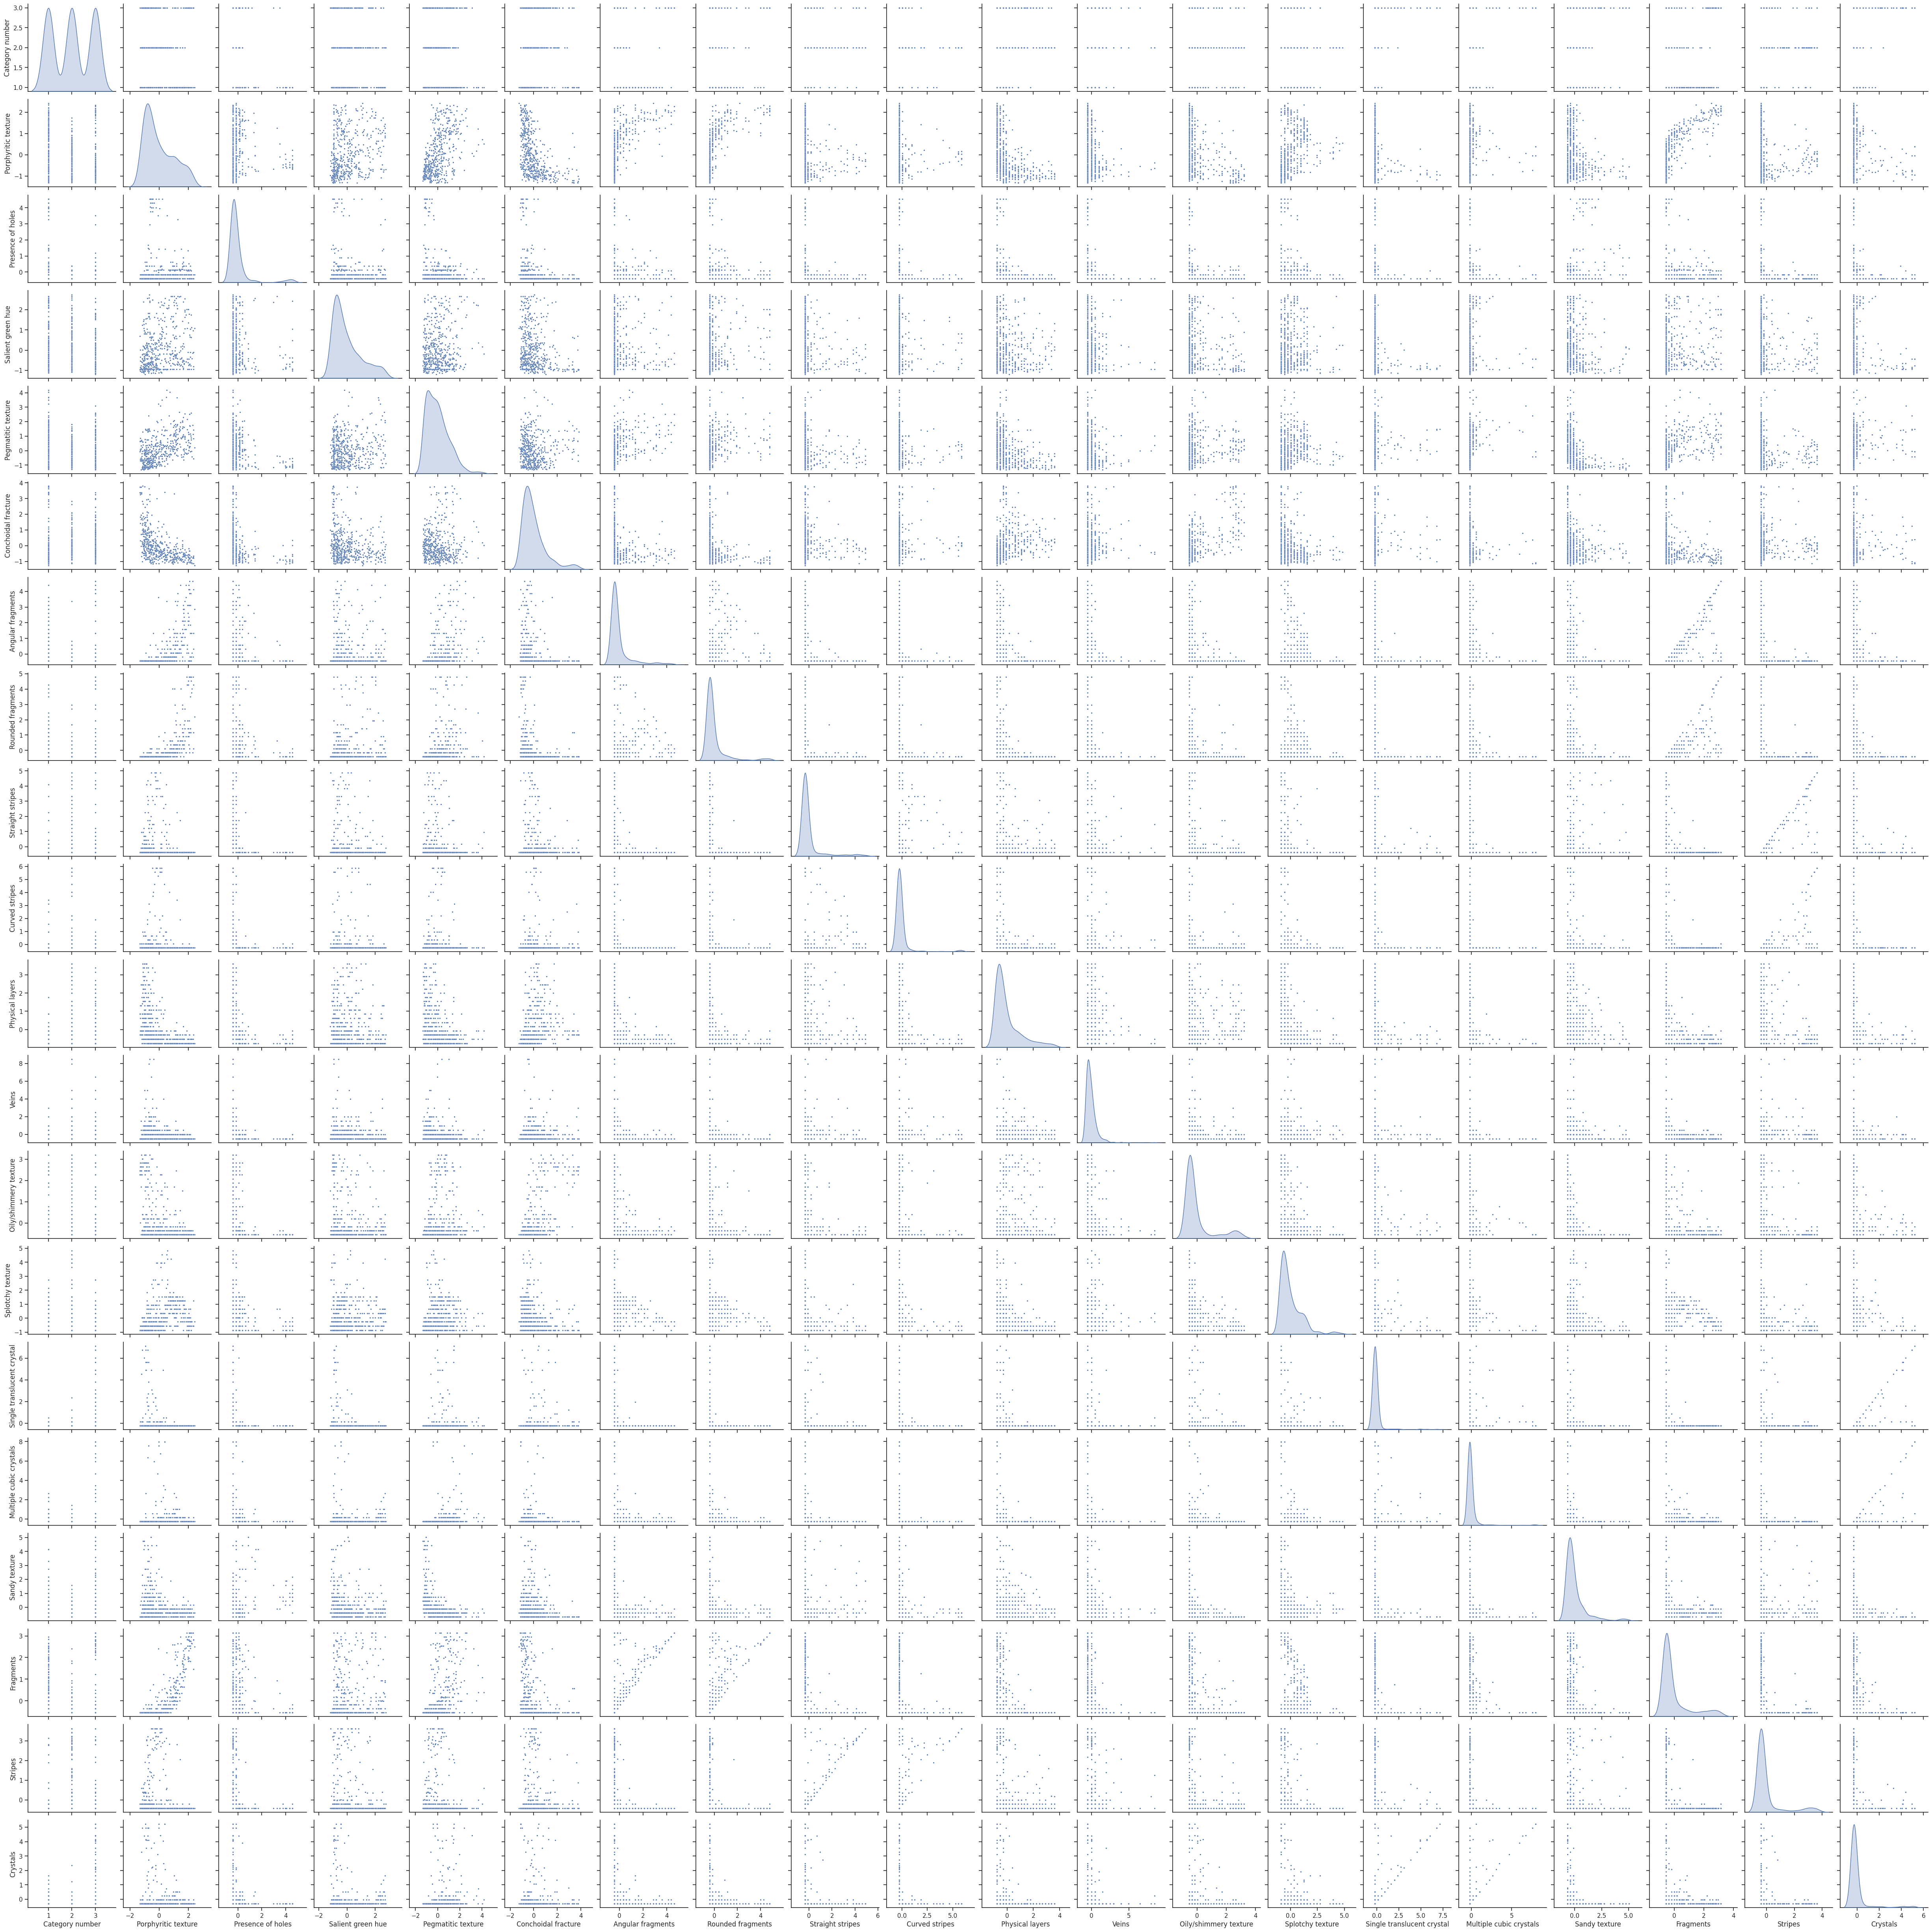

In [46]:
# Creating scatterplots for all columns against each other
sns.set(style="ticks")
sns.pairplot(df1, diag_kind="kde", markers="o", plot_kws={"s": 6}, height=2.5)
plt.show()

##**Question 3**

**Select 20% of the data for testing and 20% for validation and use the remaining 60% of the data for training. Describe how you did that and verify that your test and validation portions of the data are representative of the entire dataset.**

In [47]:
X = df1.drop(columns=['Category number'])
y = df1['Category number']

In [48]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [49]:
# Split the data into training (60%) and the remaining data (40%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Further splitting the remaining data into validation (20%) and testing (20%)
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

#class distribution in each set
train_class_distribution = y_train.value_counts(normalize=True)
valid_class_distribution = y_validation.value_counts(normalize=True)
test_class_distribution = y_test.value_counts(normalize=True)

print("Training Class Distribution:")
print(train_class_distribution)

print("\nValidation Class Distribution:")
print(valid_class_distribution)

print("\nTesting Class Distribution:")
print(test_class_distribution)


Training Class Distribution:
2    0.351852
3    0.345679
1    0.302469
Name: Category number, dtype: float64

Validation Class Distribution:
1    0.398148
3    0.314815
2    0.287037
Name: Category number, dtype: float64

Testing Class Distribution:
1    0.361111
2    0.324074
3    0.314815
Name: Category number, dtype: float64


In [50]:
train_summary = X_train.describe()
temp_summary = X_temp.describe()

train_summary

,Porphyritic texture,Presence of holes,Salient green hue,Pegmatitic texture,Conchoidal fracture,Angular fragments,Rounded fragments,Straight stripes,Curved stripes,Physical layers,Veins,Oily/shimmery texture,Splotchy texture,Single translucent crystal,Multiple cubic crystals,Sandy texture,Fragments,Stripes,Crystals
count,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000
mean,-0.044443,-0.013223,0.022865,0.021619,0.022101,0.033551,-0.068735,-0.005390,-0.001323,0.030888,0.015380,0.052727,-0.033211,0.026081,-0.005829,-0.024891,-0.025059,-0.002919,0.017290
std,0.968201,0.996488,1.018775,1.028708,0.996688,1.082697,0.854347,1.005719,0.993018,0.999393,0.981825,1.023848,0.939485,1.016207,0.978997,1.033684,0.982538,0.998744,1.002726
min,-1.321491,-0.407623,-1.187950,-1.322715,-1.165044,-0.436004,-0.405184,-0.352386,-0.260224,-0.759128,-0.512160,-0.540653,-0.846887,-0.227922,-0.225045,-0.685937,-0.541391,-0.409247,-0.310419
25%,-0.823647,-0.407623,-0.761505,-0.804631,-0.654469,-0.436004,-0.405184,-0.352386,-0.260224,-0.759128,-0.512160,-0.540653,-0.846887,-0.227922,-0.225045,-0.685937,-0.541391,-0.409247,-0.310419
50%,-0.395501,-0.407623,-0.357637,-0.182929,-0.271538,-0.436004,-0.405184,-0.352386,-0.260224,-0.299173,-0.512160,-0.353270,-0.249084,-0.227922,-0.225045,-0.401124,-0.541391,-0.409247,-0.310419
75%,0.664908,-0.159688,0.557964,0.630465,0.366680,-0.182021,-0.145018,-0.352386,-0.260224,0.390760,-0.013842,0.021496,0.348718,-0.227922,-0.225045,-0.116312,-0.173515,-0.207298,-0.310419
max,2.327709,4.551072,2.670119,4.030828,3.813059,4.643652,4.798130,4.888957,5.862693,3.610446,7.959238,3.207009,4.234434,6.752614,7.986072,5.010309,3.137369,3.629722,5.216791


In [51]:
validation_summary = X_validation.describe()
test_summary = X_test.describe()
validation_summary

,Porphyritic texture,Presence of holes,Salient green hue,Pegmatitic texture,Conchoidal fracture,Angular fragments,Rounded fragments,Straight stripes,Curved stripes,Physical layers,Veins,Oily/shimmery texture,Splotchy texture,Single translucent crystal,Multiple cubic crystals,Sandy texture,Fragments,Stripes,Crystals
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,0.096905,0.039119,-0.166992,-0.061595,-0.052889,-0.024458,0.093467,0.121046,0.040252,-0.027727,-0.115351,-0.110275,0.044282,-0.054429,-0.012164,0.082862,0.041846,0.104610,-0.036617
std,1.053492,1.007543,0.843195,0.947543,0.954840,0.966494,1.166822,1.108668,1.087420,1.032184,0.569024,0.923756,1.087331,0.998869,1.113416,1.060993,1.068924,1.093083,1.043320
min,-1.296599,-0.407623,-1.112695,-1.288176,-1.248012,-0.436004,-0.405184,-0.352386,-0.260224,-0.759128,-0.512160,-0.540653,-0.846887,-0.227922,-0.225045,-0.685937,-0.541391,-0.409247,-0.310419
25%,-0.773862,-0.407623,-0.876896,-0.865074,-0.708718,-0.436004,-0.405184,-0.352386,-0.260224,-0.759128,-0.512160,-0.540653,-0.622711,-0.227922,-0.225045,-0.685937,-0.541391,-0.409247,-0.310419
50%,-0.099283,-0.283656,-0.415333,-0.200199,-0.316214,-0.436004,-0.405184,-0.352386,-0.260224,-0.299173,-0.512160,-0.540653,-0.547986,-0.227922,-0.225045,-0.401124,-0.541391,-0.409247,-0.310419
75%,0.928766,-0.159688,0.260707,0.359333,0.322005,-0.182021,-0.145018,-0.090319,-0.260224,0.160783,-0.013842,-0.353270,0.348718,-0.227922,-0.225045,0.239703,-0.003373,-0.207298,-0.310419
max,2.422299,4.551072,2.574796,4.175892,3.742855,4.643652,4.798130,4.888957,5.862693,3.610446,2.976063,3.207009,4.533336,6.752614,7.986072,4.440684,3.137369,3.629722,5.216791


In [52]:
test_summary

,Porphyritic texture,Presence of holes,Salient green hue,Pegmatitic texture,Conchoidal fracture,Angular fragments,Rounded fragments,Straight stripes,Curved stripes,Physical layers,Veins,Oily/shimmery texture,Splotchy texture,Single translucent crystal,Multiple cubic crystals,Sandy texture,Fragments,Stripes,Crystals
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,0.036426,0.000551,0.098398,-0.003262,-0.013414,-0.076195,0.112738,-0.104878,-0.036284,-0.064936,0.069211,-0.047905,0.055352,-0.023813,0.029652,-0.008189,0.033330,-0.095853,-0.015251
std,1.039701,1.011257,1.074148,0.969428,1.059457,0.744844,1.198577,0.853780,0.935547,0.974182,1.335911,0.998330,1.087331,0.957438,0.950435,0.822997,0.987829,0.900609,0.954568
min,-1.296599,-0.407623,-1.072559,-1.288176,-1.120369,-0.436004,-0.405184,-0.352386,-0.260224,-0.759128,-0.512160,-0.540653,-0.846887,-0.227922,-0.225045,-0.685937,-0.541391,-0.409247,-0.310419
25%,-0.854762,-0.407623,-0.761505,-0.785635,-0.756584,-0.436004,-0.405184,-0.352386,-0.260224,-0.759128,-0.512160,-0.540653,-0.547986,-0.227922,-0.225045,-0.401124,-0.541391,-0.409247,-0.310419
50%,-0.325802,-0.407623,-0.337569,-0.144936,-0.392800,-0.436004,-0.405184,-0.352386,-0.260224,-0.414162,-0.512160,-0.540653,-0.249084,-0.227922,-0.225045,-0.401124,-0.541391,-0.409247,-0.310419
75%,0.927521,-0.097704,0.818848,0.585564,0.344342,-0.182021,-0.079977,-0.352386,-0.260224,-0.011701,-0.013842,-0.165887,0.348718,-0.227922,-0.225045,0.168500,0.173668,-0.409247,-0.241329
max,2.233118,4.551072,2.750390,2.656176,3.302485,3.627721,4.798130,4.102756,5.862693,3.150491,8.457556,3.207009,4.832237,7.120010,6.343848,4.440684,3.137369,3.629722,5.216791


In [53]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_validation = scaler.transform(X_validation)
X_test = scaler.transform(X_test)

## **Question 4**

**A. Multinomial Logistic Regression (softmax regression); hyperparameters to explore: C, solver, max number of iterations.**

Defining a function which returns accuracy, precision, recall, and f1-scores of our models

In [54]:
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average='weighted')
    recall = recall_score(y, y_pred, average='weighted')
    f1 = f1_score(y, y_pred, average='weighted')
    return accuracy, precision, recall, f1

Softmax Regression

In [55]:
# Define hyperparameters to explore
parameters = {
    'C': [0.01, 0.1, 10, 15],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
}

logistic = LogisticRegression(multi_class='multinomial', max_iter=100)
grid_search = GridSearchCV(logistic, parameters, cv=5)
grid_search.fit(X_train, y_train)

best_logistic = grid_search.best_estimator_

Training set scores

In [56]:
accuracy_train, precision_train, recall_train, recall_train = evaluate_model(best_logistic, X_train, y_train)
print(f"Accuracy for the training data: {accuracy_train}")
print(f"Precision for the training data: {precision_train}")
print(f"recall for the training data: {recall_train}")
print(f"f1-score for the training data: {recall_train}")

Accuracy for the training data: 0.7376543209876543
Precision for the training data: 0.7382028008231907
recall for the training data: 0.7377907822270042
f1-score for the training data: 0.7377907822270042


Validation set scores

In [57]:
accuracy_val, precision_val, recall_val, f1_val = evaluate_model(best_logistic, X_validation, y_validation)
print(f"Accuracy for the validation data: {accuracy_val}")
print(f"Precision for the validation data: {precision_val}")
print(f"recall for the validation data: {recall_val}")
print(f"f1-score for the validation data: {f1_val}")

Accuracy for the validation data: 0.7407407407407407
Precision for the validation data: 0.7449449449449449
recall for the validation data: 0.7407407407407407
f1-score for the validation data: 0.7420605740646466


Test set scores

In [58]:
accuracy_test, precision_test, recall_test, f1_test = evaluate_model(best_logistic, X_test, y_test)
print(f"Accuracy for the test data: {accuracy_test}")
print(f"Precision for the test data: {precision_test}")
print(f"recall for the test data: {recall_test}")
print(f"f1-score for the test data: {f1_test}")

Accuracy for the test data: 0.7222222222222222
Precision for the test data: 0.7249521072796936
recall for the test data: 0.7222222222222222
f1-score for the test data: 0.7201811186186186


Hyperparameters that achieved the best results

In [59]:
best_logistic

LogisticRegression(C=10, multi_class='multinomial', solver='saga')

**B. Support vector machines (make sure to try using kernels); hyperparameters to explore: C, kernel, degree of polynomial kernel, gamma.**

In [60]:
# Define hyperparameters to explore
parameters = {
    'C': [0.01, 0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto'] + [0.1, 1, 10]
}

svm = SVC(probability=True)
grid_search = GridSearchCV(svm, parameters, cv=5)
grid_search.fit(X_train, y_train)

best_svm = grid_search.best_estimator_

Training set scores

In [61]:
accuracy_train, precision_train, recall_train, recall_train = evaluate_model(best_svm, X_train, y_train)
print(f"Accuracy for the training data: {accuracy_train}")
print(f"Precision for the training data: {precision_train}")
print(f"recall for the training data: {recall_train}")
print(f"f1-score for the training data: {recall_train}")

Accuracy for the training data: 0.8364197530864198
Precision for the training data: 0.8368616123245753
recall for the training data: 0.8356028372595405
f1-score for the training data: 0.8356028372595405


Validation set scores

In [62]:
accuracy_val, precision_val, recall_val, f1_val = evaluate_model(best_svm, X_validation, y_validation)
print(f"Accuracy for the validation data: {accuracy_val}")
print(f"Precision for the validation data: {precision_val}")
print(f"recall for the validation data: {recall_val}")
print(f"f1-score for the validation data: {f1_val}")

Accuracy for the validation data: 0.7962962962962963
Precision for the validation data: 0.8049397084484804
recall for the validation data: 0.7962962962962963
f1-score for the validation data: 0.7978009259259259


Test set scores

In [63]:
accuracy_test, precision_test, recall_test, f1_test = evaluate_model(best_svm, X_test, y_test)
print(f"Accuracy for the test data: {accuracy_test}")
print(f"Precision for the test data: {precision_test}")
print(f"recall for the test data: {recall_test}")
print(f"f1-score for the test data: {f1_test}")

Accuracy for the test data: 0.7407407407407407
Precision for the test data: 0.747757014019021
recall for the test data: 0.7407407407407407
f1-score for the test data: 0.7402323833573833


Hyperparameters that achieved the best results for SVM

In [64]:
best_svm

SVC(C=1, degree=2, gamma=0.1, probability=True)

**C. Random Forest classifier (also analyze feature importance); hyperparameters to explore: the number of trees, max depth, the minimum number of samples required to split an internal node, the minimum number of samples required to be at a leaf node.**

In [65]:
# Define hyperparameters to explore
parameters = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier()
grid_search = GridSearchCV(rf, parameters, cv=5)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_

Training set scores

In [66]:
accuracy_train, precision_train, recall_train, f1_train = evaluate_model(best_rf, X_train, y_train)
print(f"Accuracy for the training data: {accuracy_train}")
print(f"Precision for the training data: {precision_train}")
print(f"recall for the training data: {recall_train}")
print(f"f1-score for the training data: {recall_train}")


Accuracy for the training data: 0.9907407407407407
Precision for the training data: 0.9907953676390254
recall for the training data: 0.9907407407407407
f1-score for the training data: 0.9907407407407407


Validation set scores

In [67]:
accuracy_val, precision_val, recall_val, f1_val = evaluate_model(best_rf, X_validation, y_validation)
print(f"Accuracy for the validation data: {accuracy_val}")
print(f"Precision for the validation data: {precision_val}")
print(f"recall for the validation data: {recall_val}")
print(f"f1-score for the validation data: {f1_val}")

Accuracy for the validation data: 0.75
Precision for the validation data: 0.7532701800232288
recall for the validation data: 0.75
f1-score for the validation data: 0.7504810004810005


Test set scores

In [68]:
accuracy_test, precision_test, recall_test, f1_test = evaluate_model(best_rf, X_test, y_test)
print(f"Accuracy for the test data: {accuracy_test}")
print(f"Precision for the test data: {precision_test}")
print(f"recall for the test data: {recall_test}")
print(f"f1-score for the test data: {f1_test}")

Accuracy for the test data: 0.7129629629629629
Precision for the test data: 0.7144905296602876
recall for the test data: 0.7129629629629629
f1-score for the test data: 0.7118552342296636


Hyperparameters that achieved the best results for random forest

In [69]:
best_rf

RandomForestClassifier(max_depth=20, min_samples_split=5)

**Feature Importance**

Porphyritic texture: 0.11661
Conchoidal fracture: 0.09613
Salient green hue: 0.07638
Pegmatitic texture: 0.07607
Fragments: 0.07562
Physical layers: 0.07184
Sandy texture: 0.06967
Presence of holes: 0.06388
Splotchy texture: 0.06168
Crystals: 0.04563
Oily/shimmery texture: 0.04527
Angular fragments: 0.03615
Stripes: 0.03587
Veins: 0.03318
Rounded fragments: 0.03057
Straight stripes: 0.02016
Curved stripes: 0.01860
Single translucent crystal: 0.01548
Multiple cubic crystals: 0.01121


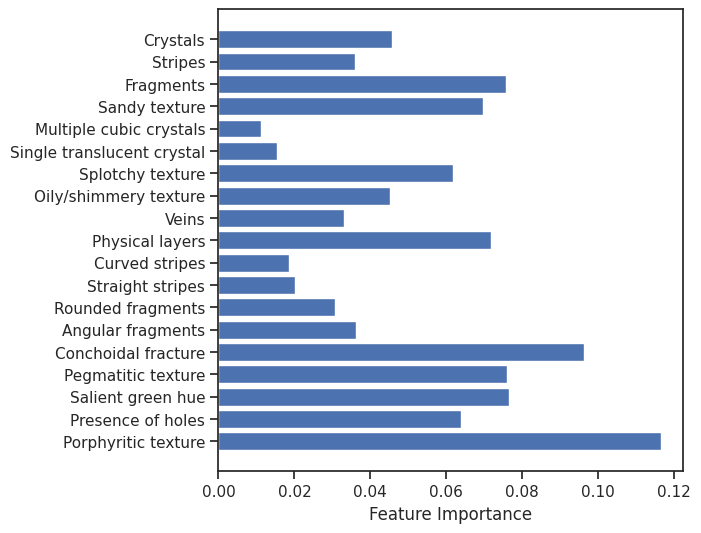

In [70]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X, y)

feature_importances = rf_classifier.feature_importances_

label_column = 'Category number'
features = [col for col in df.columns if col != label_column]

sorted_feature = sorted(zip(features, feature_importances), key=lambda x: x[1], reverse=True)

for feature, importance in sorted_feature:
    print(f"{feature}: {importance:.5f}")

plt.figure(figsize=(6, 6))
plt.barh(range(len(feature_importances)), feature_importances, tick_label=features)
plt.xlabel('Feature Importance')
plt.show()


##**Question 5**

Hard Voting Classifier on validation set

In [71]:
from sklearn.ensemble import VotingClassifier

ensemble_classifier = VotingClassifier(estimators=[
    ('logistic', best_logistic),
    ('svm', best_svm),
    ('random_forest', best_rf)
], voting='hard')

# Fit the ensemble classifier on the training data
ensemble_classifier.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_ensemble = ensemble_classifier.predict(X_validation)

# Calculate performance metrics
accuracy_ensemble = accuracy_score(y_validation, y_pred_ensemble)
precision_ensemble = precision_score(y_validation, y_pred_ensemble, average='weighted')
recall_ensemble = recall_score(y_validation, y_pred_ensemble, average='weighted')
f1_ensemble = f1_score(y_validation, y_pred_ensemble, average='weighted')

print("Ensemble validation set Accuracy:", accuracy_ensemble)
print("Ensemble validation set Precision:", precision_ensemble)
print("Ensemble validation set Recall:", recall_ensemble)
print("Ensemble validation set F1 Score:", f1_ensemble)


Ensemble validation set Accuracy: 0.7962962962962963
Ensemble validation set Precision: 0.8006201617312728
Ensemble validation set Recall: 0.7962962962962963
Ensemble validation set F1 Score: 0.79725166150471


Hard voting classifier on test set

In [72]:
ensemble_classifier = VotingClassifier(estimators=[
    ('logistic', best_logistic),
    ('svm', best_svm),
    ('random_forest', best_rf)
], voting='hard')

# Fit the ensemble classifier on the training data
ensemble_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_ensemble = ensemble_classifier.predict(X_test)

# Calculate performance metrics
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
precision_ensemble = precision_score(y_test, y_pred_ensemble, average='weighted')
recall_ensemble = recall_score(y_test, y_pred_ensemble, average='weighted')
f1_ensemble = f1_score(y_test, y_pred_ensemble, average='weighted')

print("Ensemble Test Accuracy:", accuracy_ensemble)
print("Ensemble Test Precision:", precision_ensemble)
print("Ensemble Test Recall:", recall_ensemble)
print("Ensemble Test F1 Score:", f1_ensemble)


Ensemble Test Accuracy: 0.7314814814814815
Ensemble Test Precision: 0.7369200244200245
Ensemble Test Recall: 0.7314814814814815
Ensemble Test F1 Score: 0.727559678682933


Soft voting classifier on validation set

In [73]:
ensemble_classifier = VotingClassifier(estimators=[
    ('logistic', best_logistic),
    ('svm', best_svm),
    ('random_forest', best_rf)
], voting='soft')

# Fit the ensemble classifier on the training data
ensemble_classifier.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_ensemble = ensemble_classifier.predict(X_validation)

# Calculate performance metrics
accuracy_ensemble = accuracy_score(y_validation, y_pred_ensemble)
precision_ensemble = precision_score(y_validation, y_pred_ensemble, average='weighted')
recall_ensemble = recall_score(y_validation, y_pred_ensemble, average='weighted')
f1_ensemble = f1_score(y_validation, y_pred_ensemble, average='weighted')

print("Ensemble validation set Accuracy:", accuracy_ensemble)
print("Ensemble validation set Precision:", precision_ensemble)
print("Ensemble validation set Recall:", recall_ensemble)
print("Ensemble validation set F1 Score:", f1_ensemble)

Ensemble validation set Accuracy: 0.7685185185185185
Ensemble validation set Precision: 0.7764407457389914
Ensemble validation set Recall: 0.7685185185185185
Ensemble validation set F1 Score: 0.7710152564488608


Soft voting classifier on test set

In [74]:
ensemble_classifier = VotingClassifier(estimators=[
    ('logistic', best_logistic),
    ('svm', best_svm),
    ('random_forest', best_rf)
], voting='soft')

# Fit the ensemble classifier on the training data
ensemble_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_ensemble = ensemble_classifier.predict(X_test)

# Calculate performance metrics
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
precision_ensemble = precision_score(y_test, y_pred_ensemble, average='weighted')
recall_ensemble = recall_score(y_test, y_pred_ensemble, average='weighted')
f1_ensemble = f1_score(y_test, y_pred_ensemble, average='weighted')

print("Ensemble Test Accuracy:", accuracy_ensemble)
print("Ensemble Test Precision:", precision_ensemble)
print("Ensemble Test Recall:", recall_ensemble)
print("Ensemble Test F1 Score:", f1_ensemble)


Ensemble Test Accuracy: 0.75
Ensemble Test Precision: 0.7526869044110422
Ensemble Test Recall: 0.75
Ensemble Test F1 Score: 0.7482233485219223


# **Results**

After splitting the dataset into 60% training, 20% validation, and 20% test set, we have used 3 different types of classification models(softmax regression, SVM, and Random forest classifier) for the given dataset and calculated accuracy, precision, recall, and f1-score for the training, validation, and test sets. \
The models were also tuned with different hyperparameters using Gridsearch which helps in finding the best hyperparameters for each model.

**Softmax Regression:** \
This dataset received decently good train, validation, and test scores with these hyperparameters "LogisticRegression(C=10, multi_class='multinomial', solver='saga')". This model performed well on the test set than any other model we used(96% accuracy).

**Support Vector Machines** \
SVM also produced really good results for our dataset with these "hyperparameters SVC(C=1, degree=2, gamma=0.1, probability=True)". This model performed well than any other model we used on both the validation and test set.

**Random Forest** \
Random forest performed too well only on the training set but decently good on the validation set and then really poor on the test set out of all 3 classifiers which is a case of overfitting even with different hyperparameters. \


**Ensemble Learning:**
After training the above 3 classifiers, we have performed ensemble learning(both hard voting classifier and soft voting classifier) on both the validation and test set.

For both the soft and hard voting, there are not much differences in the output.


Resources used:
1. https://chat.openai.com/ (for Random Forest and also for few errors in the code)
2. Hands-on Machine Learning book (Aurélien Géron)
3. https://www.kdnuggets.com/2016/07/softmax-regression-related-logistic-regression.html
4. https://medium.com/axum-labs/logistic-regression-vs-support-vector-machines-svm-c335610a3d16
5. https://www.datacamp.com/tutorial/random-forests-classifier-python
6.https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html